# CIS 520 Final Project

**DengAI**

**Pranav Panganamamula**

**Dinesh Jagai**

**Julian Schnitzler**

## Import Libraries

In [19]:
import pandas as pd
from sklearn.decomposition import PCA

# Visualization
import matplotlib

%matplotlib inline

## Import and Process Data

In [25]:
imputed = True
if imputed:
    X_train = pd.read_csv("data_mean_imputated/dengue_features_train_mean_imputed.csv")
    X_test = pd.read_csv("data_mean_imputated/dengue_features_test_mean_imputed.csv")

else:
    X_train = pd.read_csv("data_mean/dengue_features_train.csv")
    X_test = pd.read_csv("data/dengue_features_test.csv")
    
y_train = pd.read_csv("data/dengue_labels_train.csv")

data_train = pd.DataFrame.join(X_train, y_train, rsuffix = "_r")
data_train = data_train.drop(['city_r', 'year_r', 'weekofyear_r'], axis=1)

data_train_sj = data_train[data_train['city'] == 'sj']
data_train_iq = data_train[data_train['city'] == 'iq']
data_train_sj = data_train_sj.drop(['city'], axis=1)
data_train_iq = data_train_iq.drop('city', axis=1)
data_train_sj.head()
# process data

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,30/04/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,07/05/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,14/05/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,21/05/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,28/05/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [26]:
X_train_sj = data_train_sj.drop(['total_cases', 'week_start_date'], axis=1)
y_train_sj = data_train_sj['total_cases']

X_train_iq = data_train_iq.drop(['total_cases', 'week_start_date'], axis=1)
y_train_iq = data_train_iq['total_cases']
X_train_sj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 22 columns):
year                                     936 non-null int64
weekofyear                               936 non-null int64
ndvi_ne                                  936 non-null float64
ndvi_nw                                  936 non-null float64
ndvi_se                                  936 non-null float64
ndvi_sw                                  936 non-null float64
precipitation_amt_mm                     936 non-null float64
reanalysis_air_temp_k                    936 non-null float64
reanalysis_avg_temp_k                    936 non-null float64
reanalysis_dew_point_temp_k              936 non-null float64
reanalysis_max_air_temp_k                936 non-null float64
reanalysis_min_air_temp_k                936 non-null float64
reanalysis_precip_amt_kg_per_m2          936 non-null float64
reanalysis_relative_humidity_percent     936 non-null float64
reanalysis_sat_precip_amt_mm   

## Visualize Data

In [22]:
data_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,30/04/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07/05/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,14/05/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,21/05/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28/05/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [27]:
data_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [28]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b7d5dd8>,
      dtype=object)

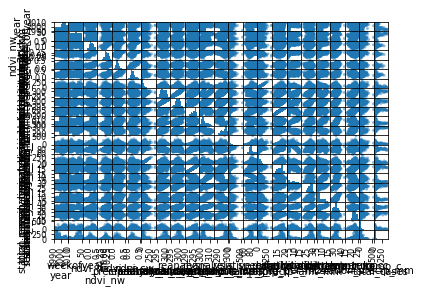

In [29]:
pd.plotting.scatter_matrix(data_train)

In [31]:
num_of_pca_components = None # t.b.d.: int or None
pca = PCA(n_components=num_of_pca_components)
data_PCA = pd.DataFrame(pca.fit_transform(X_train_sj))

In [32]:
print(data_PCA)

             0           1          2          3          4         5   \
0    -32.484709   11.473912   5.569918   8.109829  -7.481340  6.594674   
1    -25.942742   -8.526051   9.861375   5.213558  -8.614923  1.443826   
2      1.228578    0.419321 -14.762531   6.367252 -10.107026 -2.042120   
3    -37.800962   -8.570779  11.004606   1.955297  -9.092442 -2.563282   
4    -47.687549   -4.904831   6.999989   0.356523  -9.292826 -4.832637   
5    -30.706676   14.986757 -18.187186   2.198452  -9.350157 -4.050659   
6    -36.926630   26.802972  -6.689780   1.860071  -8.878861 -3.152173   
7    144.601346  -69.633807  31.869328   3.976244 -10.223384 -1.349194   
8    -19.547080   14.478312   4.464727  -0.341297  -8.929673 -4.255668   
9    -34.495694    4.310696  18.541130  -3.364695  -8.226558 -4.830063   
10    -1.506569   29.294021 -31.961508   0.503441  -9.500940 -1.781687   
11    29.624618   -8.122725  22.897044  -2.164164  -8.457955 -2.241526   
12   -18.005201   23.735719  -5.081701